# Úkoly

1. Vytvořte pole 3x4 typu `bool` se všemi prvky `True`.
2. Vytvořte matici 5x5 kde jediné nenulová prvky jsou [1, 2, 3, 4] pod hlavní diagonálou (nápověda - podívejte se na nápovědu funkce `diagflat`).
```
0 0 0 0 0
1 0 0 0 0
0 2 0 0 0
0 0 3 0 0 
0 0 0 4 0
```

In [1]:
import numpy as np
A = np.ndarray(shape =(3, 4), dtype=bool)
A.fill(True)
print(A)

B = np.diagflat([1,2,3,4], k=-1)
print(B)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


3. Z pole 8x8 samých nul vyvořte pomocí řezů co nejelegantnějším způsobem 8x8 matici, která vypadá jako šachovnice.
```
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
```
4. Pomocí `np.random.randint` vytvořte vektor dvouciferných kladných celých čísel. Poté pomocí indexu typu masky nahraďte liché hodnoty jejich opačnou hodnotou. Např. [11, 20, 42, 33] -> [-11, 20, 42, -33].

In [2]:
C=np.zeros((8,8), dtype=int)
C[::2, 1::2] =1
C[1::2,::2]=1
print(C)

d=np.random.randint(10, 99, 5)
maska = np.arange(len(d)) % 2 == 0
d[maska] *=-1
print(d)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]
[-24  26 -47  36 -41]


5. Ověřte empiricky na náhodné matici, že platí $(AB)^T = B^T A^T$


In [3]:
E=np.random.randint(10, 99, size=(5, 5))
F=np.random.randint(10, 99, size=(5, 5))
G=np.transpose(E@F)
H=np.transpose(F)@np.transpose(E)
if np.array_equal(G, H):
    print("Platí")
else:
    print("Neplatí")


Platí


6. Pro náhodné 1D vektory $u, v$ vypočítejte dyadický součin $uv$ $$(uv)_{ij} = u_iv_j$$ pomocí `newaxis`. Zkontrolujte s `np.outer(u, v)`

In [4]:
i=np.random.randint(10, 99, 5)
j=np.random.randint(10, 99, 5)
K=i[:, np.newaxis] * j[np.newaxis, :]
L=np.outer(i, j)
if np.array_equal(K, L):
    print("Platí")
else:
    print("Neplatí")

Platí


7. Vytvořte šachovnicovou matici pomocí `tile`.

In [5]:
M=np.tile(C, (2, 2))
print(M)

[[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]]


# Domácí úkoly
## 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [8]:
A = integer_spiral(7)
print(A)

[[31. 30. 29. 28. 27. 26. 49.]
 [32. 13. 12. 11. 10. 25. 48.]
 [33. 14.  3.  2.  9. 24. 47.]
 [34. 15.  4.  1.  8. 23. 46.]
 [35. 16.  5.  6.  7. 22. 45.]
 [36. 17. 18. 19. 20. 21. 44.]
 [37. 38. 39. 40. 41. 42. 43.]]


In [9]:
def integer_spiral_numpy(n):
    Matice=np.zeros((n, n), dtype=int)
    pocet_prvku=n*n
    pocet_cyklu=(n+1)//2
    for i in range(pocet_cyklu):
        if i == (pocet_cyklu-1):
            #poslední
            Matice[pocet_cyklu-1, pocet_cyklu-1] = pocet_prvku
        else:
            vektor = Matice[i:n-i-1, n-1-i]
            for j in range(vektor.shape[0]):
                vektor[j]=pocet_prvku
                pocet_prvku -= 1

            vektor = Matice[n-1-i, i+1:n-i]
            for j in range(vektor.size-1, -1, -1):
                vektor[j]=pocet_prvku
                pocet_prvku -= 1

            vektor = Matice[n-1-i:i:-1, i]
            for j in range(vektor.shape[0]):
                vektor[j]=pocet_prvku
                pocet_prvku -= 1

            vektor = Matice[i, i:n-1-i]
            for j in range(vektor.size):
                vektor[j]=pocet_prvku
                pocet_prvku -= 1
    return Matice

In [10]:
A = integer_spiral_numpy(7)
print(A)

[[31 30 29 28 27 26 49]
 [32 13 12 11 10 25 48]
 [33 14  3  2  9 24 47]
 [34 15  4  1  8 23 46]
 [35 16  5  6  7 22 45]
 [36 17 18 19 20 21 44]
 [37 38 39 40 41 42 43]]


## 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
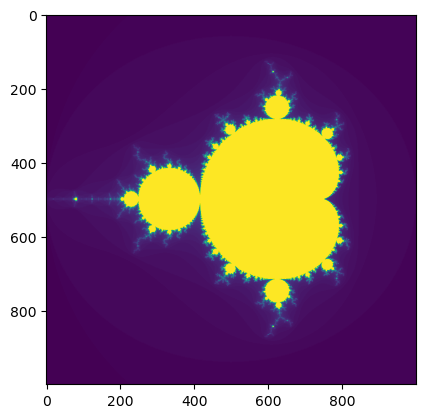

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [27]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    x, y = np.mgrid[x_min:x_max:n*1j, y_min:y_max:n*1j]
    C=x+1j*y
    z=np.zeros_like(C, dtype=complex)
    M=np.full_like(C, True, dtype=bool)
    for i in range(k):
        z=z**2+C
        pole = (np.abs(z)>2)&M
        M[pole]=False
    return M.T
    

/tmp/ipykernel_6318/3889707453.py:7: RuntimeWarning: overflow encountered in square
  z=z**2+C
/tmp/ipykernel_6318/3889707453.py:7: RuntimeWarning: invalid value encountered in square
  z=z**2+C
/tmp/ipykernel_6318/3889707453.py:8: RuntimeWarning: overflow encountered in absolute
  pole = (np.abs(z)>2)&M


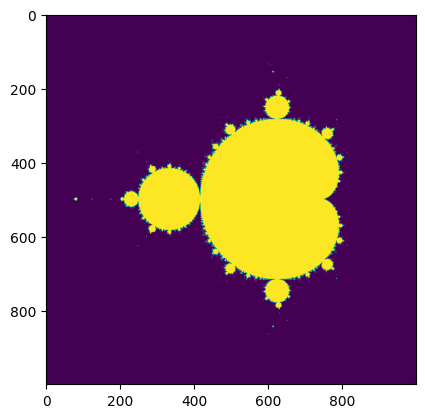

In [28]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
- Zkuste si číselnou spirálu vykreslit, a vykreslit různé funkce, můžete dostat zajímavé obrázky.
- Zkuste místo posloupnosti 1,2,... udělat spirálu pouze z prvočísel.
- Zkuste vykresilt další typy fraktálů, např. Julia set viz [Wikipedia](https://en.wikipedia.org/wiki/Julia_set).

In [ ]:
A = integer_spiral(1001)
plt.imshow(A)
# new figure
plt.figure()
plt.imshow(np.sin(A*0.03))